                                            Research Question: 

# Does the Number of Tesla Motors' Deaths involving, "Fire" and its synonyms, differ from the US population?


The following study compares two datasets: Countrywide 'descriptions'of fatal accidents vs Tesla Death 'descriptions'. 

The countrywide comprehensive Big Data study to was originally compiled to predict the severity of car accidents with several exogenious factors; The Big Data Study also comes with an accident 'Description' column, containing words to be mined. 

https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents

Also, the Tesla Automotible Fatalities Dataset will be compared to the big-data-baseline. The Tesla deaths dataset has a 'description' column that can be exploited for the relevant keywords associated with 'fire' or its synonyms?.

https://www.kaggle.com/datasets/thedevastator/tesla-accident-fatalities-analysis-and-statistic


The term "null" comes from the Latin word "nullus," meaning "none" or "zero." In essence, the null hypothesis represents the absence of an observed effect or relationship.


Null Hypothesis H0: 
There is no difference between the distributions of the scores of these two populations. 

Alternative Hypothesis H1: 
At least one of the two populations differ. 


In [1]:
jupyter nbconvert --to pdf US_accidents.ipynb

SyntaxError: invalid syntax (450419893.py, line 1)

In [5]:
#-- Importing Nessesary Liberaries --#
import scipy.stats as stats
from scipy.stats import chi2_contingency
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#-- Importing the Dataset --#
US_df = pd.read_csv("/Users/michaelsegaline/Desktop/Car accidents study/US_Accidents_March23.csv")

In [35]:
#--Inspecting the Dataset --#
US_df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


Big Data! 7,728,394 instances of accidents with 46 variables to be explored

In [36]:
#-- Inspecting the Shape of the Data--#
US_df.shape

(7728394, 46)

In [37]:
#-- Now inspecting the data types --#
US_df.dtypes

ID                        object
Source                    object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Street                    object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity                     bool
Bump      

# Cleaning the Dataset and reducing it to the same variables as the the Tesla Motors Study

In [41]:
#-- Selecting specific columns and create a new DataFrame --#
selected_columns = ['Severity','Description']
US_df_selected = US_df[selected_columns]

print(US_df_selected)

         Severity                                        Description
0               3  Right lane blocked due to accident on I-70 Eas...
1               2  Accident on Brice Rd at Tussing Rd. Expect del...
2               2  Accident on OH-32 State Route 32 Westbound at ...
3               3  Accident on I-75 Southbound at Exits 52 52B US...
4               2  Accident on McEwen Rd at OH-725 Miamisburg Cen...
...           ...                                                ...
7728389         2                           At Market St - Accident.
7728390         2    At Camino Del Rio/Mission Center Rd - Accident.
7728391         2  At Glassell St/Grand Ave - Accident. in the ri...
7728392         2     At CA-90/Marina Fwy/Jefferson Blvd - Accident.
7728393         2              At Highland Ave/Arden Ave - Accident.

[7728394 rows x 2 columns]


In [42]:
#-- Dropping all the empty rows --#
US_df_clean = US_df_selected.dropna()

In [43]:
US_df_clean.shape

(7728389, 2)

# Now isolating Severity = 4, because that represents a death. 

In [44]:
US_df_clean['Severity4'] = 0
US_df_clean.loc[US_df_clean['Severity'] == 4, 'Severity4'] = 1
US_df_clean = US_df_clean.drop(['Severity'], axis = 1)
US_df_clean.Severity4.value_counts()

/var/folders/_5/26fwgmd14qz8pgwfvn4dfky40000gn/T/ipykernel_15493/2613976490.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_df_clean['Severity4'] = 0


0    7523679
1     204710
Name: Severity4, dtype: int64

# Of 7,728,389 accidents; 204,710 were fatal. 

Of these accidents, we will now explore how many contained the words:'ignites','fire', 'combusts', 'flames','burns','explosion', in the "description" column.

In [46]:
#-- List of target words --#
target_words = ['ignites','fire', 'combusts', 'flames','burns','explosion']

#-- Filter the DataFrame for 'Severity4' --#
severity4_descriptions = US_df_clean[US_df_clean['Severity4'] == 1]['Description']

#-- Count occurrences of target words --#
word_counts = severity4_descriptions.str.lower().str.count('|'.join(target_words)).sum()

print("Total occurrences of target words:", word_counts)

Total occurrences of target words: 652


In [76]:
US_df_clean['tgt_words'] = word_counts


# Of 204,710 traffic deaths from 2016 to 2023; 
# 652 instances contain the following words in the accident description:

# 'ignites', 'fire', 'combusts', 'flames', 'burns', 'explosion' 

# 652 / 204710 = 0.003 or .3% or less that 1% of auto related fatalites involve fire.


In [69]:
652 / 204710

0.0031849934053050657

# Now exploring the Tesla Fatalities Dataset

In [47]:
#-- Importing the Dataset --#
Tesla_df = pd.read_csv("/Users/michaelsegaline/Desktop/Telsa Deaths/Tesla Deaths analysis.csv")

In [48]:
#-- Inspecting the dataset --#
Tesla_df.head()

,Year,Date,Country,State,Description,Deaths
0,2022.0,1/30/23,USA,MO,Speeding Tesla crashes into car,1.0
1,2022.0,1/21/23,USA,CA,Tesla crashses into resident's pool,1.0
2,2022.0,1/17/23,USA,CA,Tesla crashes into back of semi,1.0
3,2022.0,1/7/23,Canada,-,Tesla crashes,1.0
4,2022.0,1/7/23,USA,WA,"Tesla hits pole, catches on fire",1.0


In [49]:
#-- 309 original rows --#
Tesla_df.shape

(309, 6)

In [50]:
#-- Dropping all empty rows --#
Tesla_df = Tesla_df.dropna()

In [51]:
#-- No, Missing Values --#
#-- The dataset was 4% sparse --#
Tesla_df.shape

(296, 6)

# 296 Tesla Deaths since inception, according to the dataset.

In [52]:
#-- Removing White spaces in the Column titles --#

Tesla_df.columns = Tesla_df.columns.str.strip()

# Now creating the WordCloud of frequenty used words to describe Tesla deaths. 

The size of the word represents the frequency.

In [53]:
#-- Importing Nesseary liberaries --#
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import warnings
from collections import Counter
import datetime
import wordcloud
from wordcloud import WordCloud

In [54]:
#-- Filter the dataframe --#
word_count = Tesla_df.Description 

#-- Combine all the video titles into one string --#
all_titles = ' '.join(Tesla_df['Description'])

#-- Tokenize the string --#
tokens = word_tokenize(all_titles.lower())

#-- Filter out stop words --#
stop_words = set(stopwords.words('english'))
filtered_tokens = [token for token in tokens if token not in stop_words]

#-- Displaying a WordCloud of words --#
word_freq = Counter(filtered_tokens)

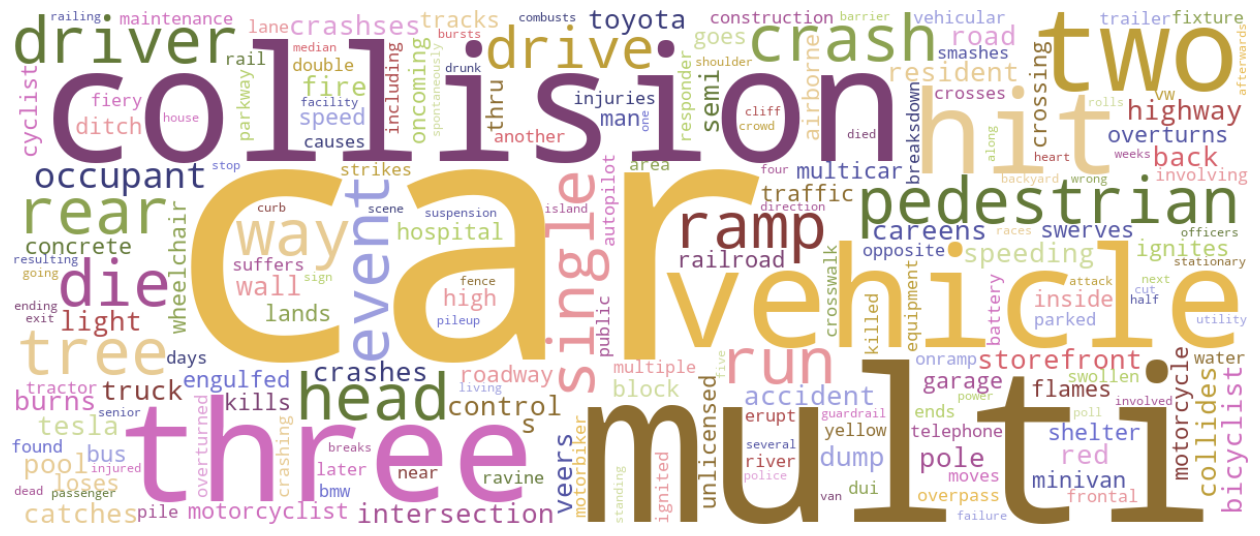

In [55]:
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(word_freq))
plt.figure(figsize=(16,11))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

# Now counting how many unique instances (rows) contained the word 'fire' in the description of the Tesla deaths. 

In [56]:
#-- Create a list of the target word(s) --#
word_to_search = ["fire"]

#-- Use boolean indexing to filter rows containing the specified word(s) --#
filtered_rows = Tesla_df[Tesla_df['Description'].str.contains('|'.join(word_to_search), case=False, na=False)]

#-- Count the number of rows that contain the specified word(s) --#
count_of_rows = len(filtered_rows)

#-- Print the count --#
print("Number of rows containing  'fire'", count_of_rows)

Number of rows containing  'fire' 19


# Its important to include the synonyms of 'fire', to detect those detect avoidance of directly stating 'fire'.

For example: car 'ignites' on impact and was engulfed in 'flames'.

In [70]:
#-- List of search words --#
words_to_search = ["bursts","ignites", "combust", "flames", "burns"]

#-- Use boolean indexing to filter rows containing the specified words --#
filtered_rows = Tesla_df[Tesla_df['Description'].str.contains('|'.join(words_to_search), case=False, na=False)]

#-- Count the number of rows that contain the specified words. --#
Tesla_tgt_words = len(filtered_rows)

#-- Print the count --#
print("Number of rows containing 'ignite','flames','combust', or 'burns':", Tesla_tgt_words)

Number of rows containing 'ignite','flames','combust', or 'burns': 24


In [71]:
#-- List of search words --#
words_to_search = ["bursts","ignites", "fire", "combust", "flames", "burns"]

#-- Use boolean indexing to filter rows containing the specified words --#
filtered_rows = Tesla_df[Tesla_df['Description'].str.contains('|'.join(words_to_search), case=False, na=False)]

#-- Count the number of rows that contain the specified words. --#
Tesla_tgt_words = len(filtered_rows)

#-- Print the count --#
print("Number of rows containing 'ignite', 'fire','flames','combust', or 'burns':", Tesla_tgt_words)

Number of rows containing 'ignite', 'fire','flames','combust', or 'burns': 41


In [75]:


Tesla_df['tgt_words'] = Tesla_tgt_words

In [59]:
#-- 41 Fire-Deaths / 296 Total-Deaths

41 / 296

0.13851351351351351

# No, 13.8% and 0.003% are not in the same range or proportion within a sample population.

This means that 13.8% represents roughly 138 out of every 1000, or 138 occurrences out of 1000 occurrences.

However, the national baseline is 0.003% is equivalent to 0.003 in decimal form. This represents a much smaller proportion, indicating only 3 occurrences out of every 10,000.

# In other words, 13.8% is significantly larger than 0.003%, and they would represent different magnitudes within the same sample population.

# The following two statistical tests will be conducted to reconfirm this finding: Shapiro-Wilk and Kruskal Wallis

Shapiro-Wilk Test: Tests the dataset distrobution for normality or 'Guasian' behavior.
Kruskal Wallis inspects for differences between groups of non-parametric (Non-Guasian) groups of 2 or more continous variables.

In [60]:
td_test = Tesla_df.Deaths
shapiro_test = stats.shapiro(td_test)
shapiro_test
shapiro_test.statistic
shapiro_test.pvalue

2.092158913909898e-29

A p-value of e-29 means it is not near '1' or perfectly gausian, Bell shaped, or normally distributed.

In [65]:
US_test = US_df_clean['Severity4']
shapiro_test = stats.shapiro(US_test)
shapiro_test
shapiro_test.statistic
shapiro_test.pvalue

/Users/michaelsegaline/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


0.0

A p-value of 0.0 means it is not near '1' or perfectly gausian, Bell shaped, or normally distributed.

Therefore, both datasets are not parametric and require non-parametric tests. Therefore, the follow Chi-Square Test will be preformed to analysis the distrobutions further. 

In [82]:
from scipy.stats import mannwhitneyu

# Assuming you have 'US_df_clean' and 'Tesla_df' DataFrames

# Extract the data for the Mann-Whitney U test
us_tgt_words = US_df_clean['tgt_words']
tesla_tgt_words = Tesla_df['tgt_words']

# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(us_tgt_words, tesla_tgt_words, alternative='two-sided')

print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)

Mann-Whitney U statistic: 2287603144.0
P-value: 2.672156781397244e-195


In [83]:
group1 = US_df_clean.Severity4
group2 = US_df_clean.tgt_words
group3 = Tesla_df.Deaths
group4 = Tesla_df.tgt_words

In [85]:
#-- Now comparing all groups: Deaths and target words--#
stats.kruskal(group1, group2, group3, group4)

KruskalResult(statistic=15260627.649248512, pvalue=0.0)

In [89]:
#-- Now comparing Deaths between the datasets --#
stats.kruskal(group1, group3)

KruskalResult(statistic=10957.623983273827, pvalue=0.0)

In [90]:
#-- Now comparing tgt_words between the datasets --#
stats.kruskal(group2, group4)

KruskalResult(statistic=7728683.999999381, pvalue=0.0)

# Based on the analysis of the data and the results of the Shapiro-Wilk test and Kruskal - Wallis test, we reject the null hypothesis in favor of the alternative hypothesis. This means that there is evidence to suggest a significant difference between the percentage of Tesla fatalities involving 'fire' or related synonyms (13.8%) and the percentage of deaths in the U.S. population due to fire-related incidents.

The conclusion aligns with the statistical findings, indicating that there is a notable difference between the two populations in terms of fatalities related to 'fire' or similar terms. This highlights the importance of further investigation and attention to safety in the context of Tesla and similar electric vehicles.

In [3]:
13.8 / 0.3

46.00000000000001

# Tesla Automobiles are 46x more likely to fatally-catch-fire compared to a combustion engine.